In [2]:
import math
import pandas_datareader as web
import tushare as ts
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [42]:
pro = ts.pro_api()

df = pro.daily(ts_code='000002.SZ', start_date='201200101', end_date='20200119')
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000002.SZ,20200117,30.62,30.85,30.32,30.46,30.53,-0.07,-0.2293,472219.27,1.442666e+06
1,000002.SZ,20200116,30.62,30.93,30.40,30.53,30.49,0.04,0.1312,581395.89,1.779302e+06
2,000002.SZ,20200115,31.30,31.49,30.46,30.49,31.39,-0.90,-2.8672,672944.31,2.071444e+06
3,000002.SZ,20200114,31.55,31.79,31.37,31.39,31.68,-0.29,-0.9154,419712.28,1.322401e+06
4,000002.SZ,20200113,31.40,31.78,31.26,31.68,31.46,0.22,0.6993,620749.12,1.957170e+06
...,...,...,...,...,...,...,...,...,...,...,...
1801,000002.SZ,20120110,7.35,7.61,7.32,7.53,7.41,0.12,1.6200,1077976.78,8.048543e+05
1802,000002.SZ,20120109,7.16,7.41,7.08,7.41,7.16,0.25,3.4900,846037.78,6.119339e+05
1803,000002.SZ,20120106,7.27,7.33,7.06,7.16,7.25,-0.09,-1.2400,542769.61,3.892841e+05
1804,000002.SZ,20120105,7.31,7.42,7.19,7.25,7.33,-0.08,-1.0900,528117.81,3.872447e+05


In [4]:
df.shape

(1945, 11)

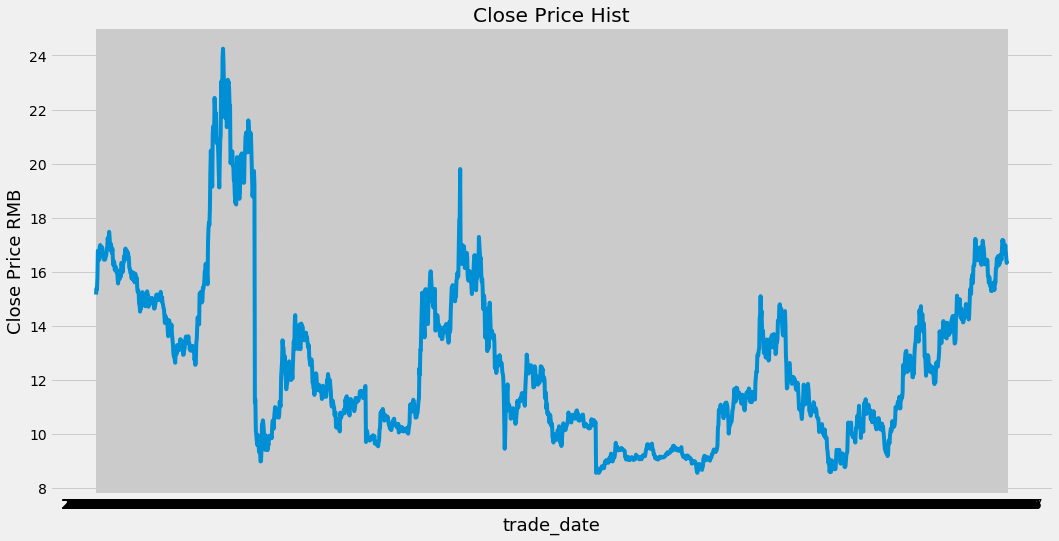

In [41]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Hist')
plt.plot(df['close'])
plt.xlabel('trade_date', fontsize=18)
plt.ylabel('Close Price RMB', fontsize=18)
plt.show()

In [14]:
df = df.sort_values(by=['trade_date'], ascending=True)
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
1944,000001.SZ,20120104,15.59,15.59,15.15,15.16,15.59,-0.43,-2.7600,147910.98,2.275637e+05
1943,000001.SZ,20120105,15.16,15.55,15.13,15.39,15.16,0.23,1.5200,244080.05,3.758806e+05
1942,000001.SZ,20120106,15.35,15.51,15.15,15.35,15.39,-0.04,-0.2600,133151.15,2.041437e+05
1941,000001.SZ,20120109,15.36,15.81,15.25,15.78,15.35,0.43,2.8000,221138.66,3.459387e+05
1940,000001.SZ,20120120,16.73,16.94,16.32,16.78,15.78,1.00,6.3400,586675.66,9.728268e+05
...,...,...,...,...,...,...,...,...,...,...,...
4,000001.SZ,20200113,16.75,17.03,16.61,16.99,16.69,0.30,1.7975,872133.36,1.468272e+06
3,000001.SZ,20200114,16.99,17.27,16.76,16.76,16.99,-0.23,-1.3537,1304493.66,2.217609e+06
2,000001.SZ,20200115,16.79,16.86,16.45,16.52,16.76,-0.24,-1.4320,859439.12,1.424889e+06
1,000001.SZ,20200116,16.52,16.57,16.20,16.33,16.52,-0.19,-1.1501,1028104.67,1.678889e+06


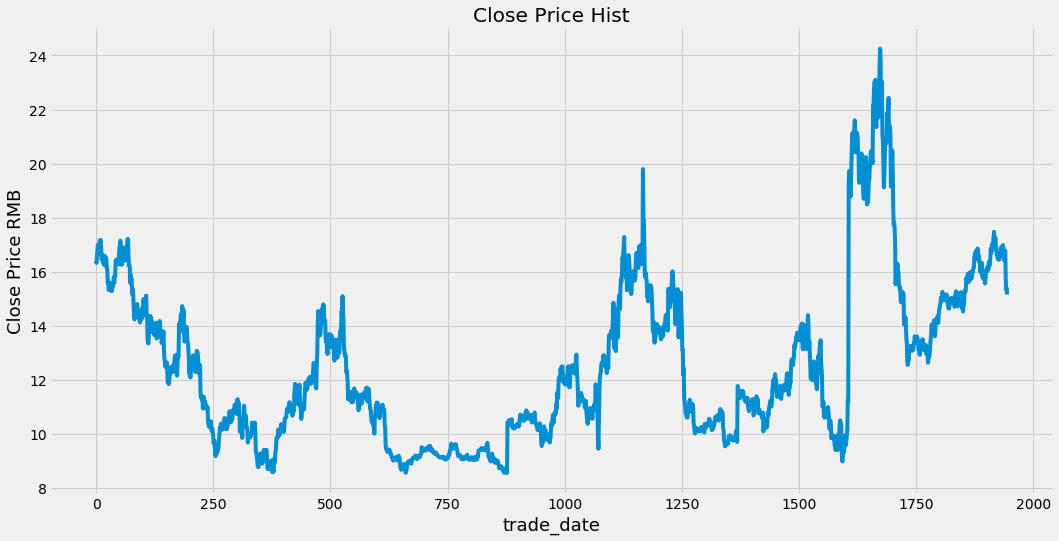

In [15]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Hist')
plt.plot(df['close'])
plt.xlabel('trade_date', fontsize=18)
plt.ylabel('Close Price RMB', fontsize=18)
plt.show()

In [17]:
df = df.set_index('trade_date')
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20120104,000001.SZ,15.59,15.59,15.15,15.16,15.59,-0.43,-2.7600,147910.98,2.275637e+05
20120105,000001.SZ,15.16,15.55,15.13,15.39,15.16,0.23,1.5200,244080.05,3.758806e+05
20120106,000001.SZ,15.35,15.51,15.15,15.35,15.39,-0.04,-0.2600,133151.15,2.041437e+05
20120109,000001.SZ,15.36,15.81,15.25,15.78,15.35,0.43,2.8000,221138.66,3.459387e+05
20120120,000001.SZ,16.73,16.94,16.32,16.78,15.78,1.00,6.3400,586675.66,9.728268e+05
...,...,...,...,...,...,...,...,...,...,...
20200113,000001.SZ,16.75,17.03,16.61,16.99,16.69,0.30,1.7975,872133.36,1.468272e+06
20200114,000001.SZ,16.99,17.27,16.76,16.76,16.99,-0.23,-1.3537,1304493.66,2.217609e+06
20200115,000001.SZ,16.79,16.86,16.45,16.52,16.76,-0.24,-1.4320,859439.12,1.424889e+06


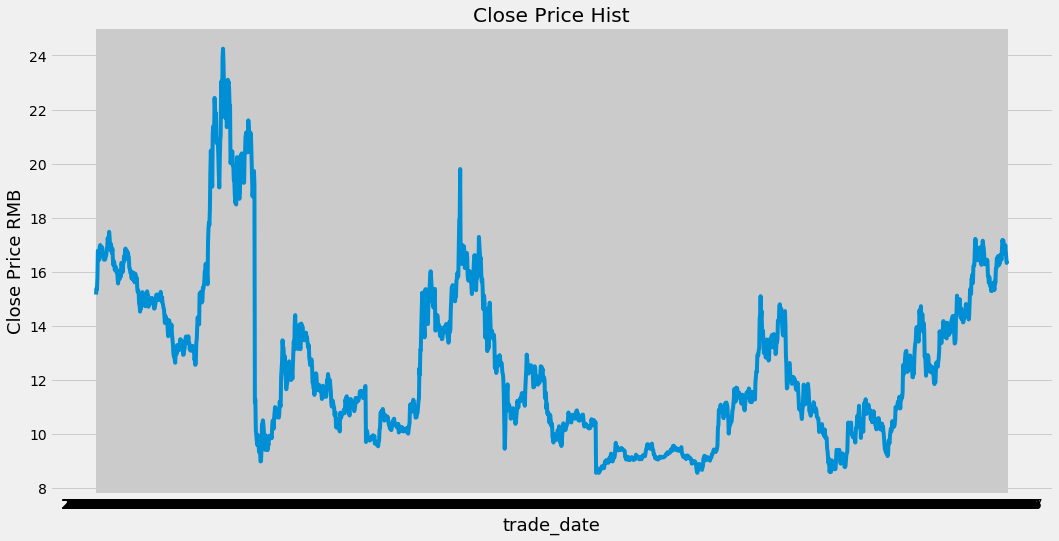

In [21]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Hist')
plt.plot(df['close'])
plt.xlabel('trade_date', fontsize=18)
plt.ylabel('Close Price RMB', fontsize=18)
plt.show()

In [22]:
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20120104,000001.SZ,15.59,15.59,15.15,15.16,15.59,-0.43,-2.7600,147910.98,2.275637e+05
20120105,000001.SZ,15.16,15.55,15.13,15.39,15.16,0.23,1.5200,244080.05,3.758806e+05
20120106,000001.SZ,15.35,15.51,15.15,15.35,15.39,-0.04,-0.2600,133151.15,2.041437e+05
20120109,000001.SZ,15.36,15.81,15.25,15.78,15.35,0.43,2.8000,221138.66,3.459387e+05
20120120,000001.SZ,16.73,16.94,16.32,16.78,15.78,1.00,6.3400,586675.66,9.728268e+05
...,...,...,...,...,...,...,...,...,...,...
20200113,000001.SZ,16.75,17.03,16.61,16.99,16.69,0.30,1.7975,872133.36,1.468272e+06
20200114,000001.SZ,16.99,17.27,16.76,16.76,16.99,-0.23,-1.3537,1304493.66,2.217609e+06
20200115,000001.SZ,16.79,16.86,16.45,16.52,16.76,-0.24,-1.4320,859439.12,1.424889e+06


In [23]:
df.drop(['ts_code', 'open', 'high', 'low', 'pre_close','pct_chg', 'vol', 'amount'], axis=1)

,close,change
trade_date,,
20120104,15.16,-0.43
20120105,15.39,0.23
20120106,15.35,-0.04
20120109,15.78,0.43
20120120,16.78,1.00
...,...,...
20200113,16.99,0.30
20200114,16.76,-0.23
20200115,16.52,-0.24


In [26]:
df = df.drop(['ts_code', 'open', 'high', 'low', 'pre_close','pct_chg', 'vol', 'amount', 'change'], axis=1)
df

,close
trade_date,
20120104,15.16
20120105,15.39
20120106,15.35
20120109,15.78
20120120,16.78
...,...
20200113,16.99
20200114,16.76
20200115,16.52


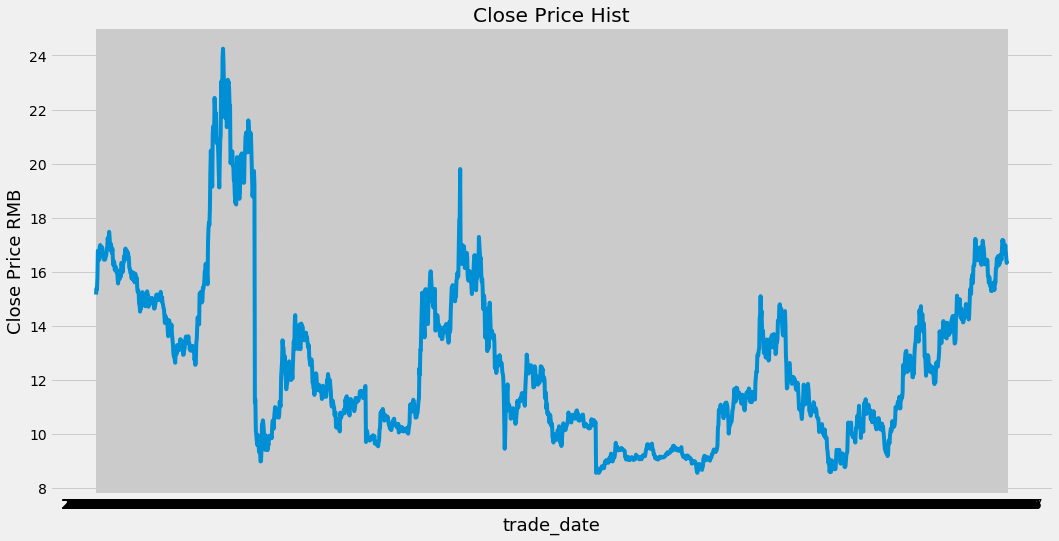

In [27]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Hist')
plt.plot(df['close'])
plt.xlabel('trade_date', fontsize=18)
plt.ylabel('Close Price RMB', fontsize=18)
plt.show()

In [28]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1556

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.42028061],
       [0.43494898],
       [0.43239796],
       ...,
       [0.50701531],
       [0.49489796],
       [0.49872449]])

In [30]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

# ????
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.42028061, 0.43494898, 0.43239796, 0.45982143, 0.52359694,
       0.51913265, 0.51466837, 0.50255102, 0.53252551, 0.5369898 ,
       0.52678571, 0.51147959, 0.53125   , 0.53188776, 0.51721939,
       0.51211735, 0.51339286, 0.50255102, 0.50255102, 0.50255102,
       0.50510204, 0.51339286, 0.51403061, 0.52933673, 0.53252551,
       0.55357143, 0.5440051 , 0.55229592, 0.5682398 , 0.55484694,
       0.53443878, 0.52487245, 0.53954082, 0.52933673, 0.5184949 ,
       0.52806122, 0.50446429, 0.48979592, 0.49936224, 0.49617347,
       0.47831633, 0.48022959, 0.48596939, 0.4744898 , 0.47640306,
       0.47831633, 0.45982143, 0.44642857, 0.45535714, 0.45727041,
       0.47321429, 0.45790816, 0.46619898, 0.4630102 , 0.49489796,
       0.49298469, 0.48533163, 0.47321429, 0.49043367, 0.49681122])]
[0.5108418367346936]

[array([0.42028061, 0.43494898, 0.43239796, 0.45982143, 0.52359694,
       0.51913265, 0.51466837, 0.50255102, 0.53252551, 0.5369898 ,
       0.52678571, 0.51147959, 0.531

In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1496, 60, 1)

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=1)

1496/1496 [==============================] - 55s 37ms/step - loss: 0.0039


In [34]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [35]:
x_test = np.array(x_test)

In [36]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [37]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [38]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.1565707831885331

C:\Users\JAYHAN02\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


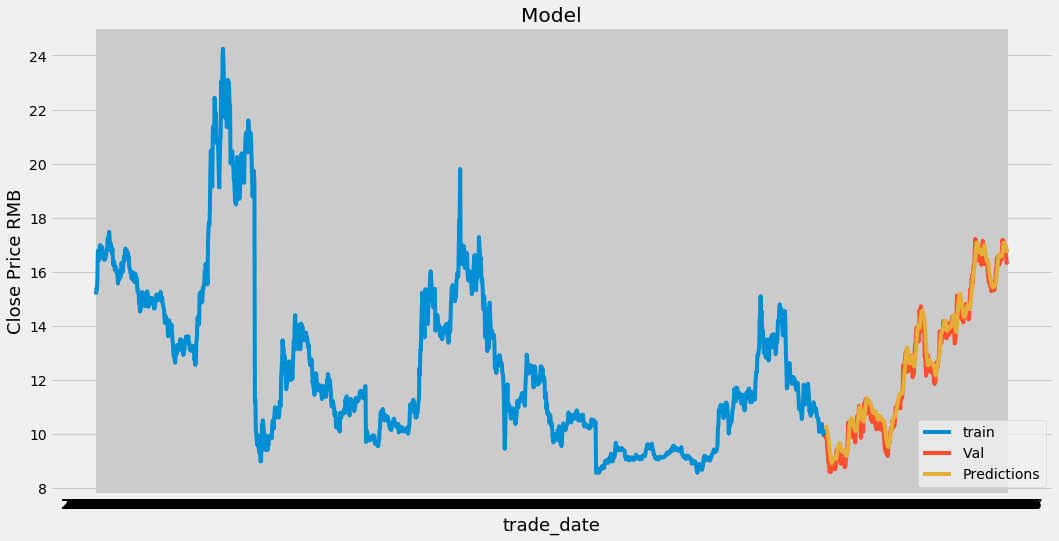

In [40]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('trade_date', fontsize=18)
plt.ylabel('Close Price RMB', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['train', 'Val', 'Predictions'], loc='lower right')
plt.show()